# Section 1: Business understanding

We want to find:"How mobile phone pricing is formed?"
Key questions we wanted to answer:

1. Have average prices for brands changed over the years?
2. Can we predict price based only on inflation?
3. Does price depend on features of the phone?
4. Can We Predict Prices Using Machine Learning Techniques like RainForestRegression?


# Section 2: Data Understanding


In [197]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV




Before diving in cleaning and transforamting data, let explore what we have.We have a Table with 22 columns:'phone_name','brand','os','inches','resolution','battery','battery_type','ram(GB)','announcement_date','weigh(g)','storage(GB)','video_720p','video_1080p','video_4K','video_8K','video_30fps','video_60fps','video_120fps','video_240fps','video_480fps','video_960fps','price(USD)'].We want to find if all these features have any influence on price.

## Gather and Assess data


In [198]:

phone_base=pd.read_csv('/Users/reznichenkoanastasia/Downloads/cleaned_all_phones.csv')
phone_base.head()


,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


## Checking for missing values

In [199]:
#checking for Nan values
phone_base.isnull().sum()

phone_name           0
brand                0
os                   0
inches               0
resolution           0
battery              0
battery_type         0
ram(GB)              0
announcement_date    0
weight(g)            0
storage(GB)          0
video_720p           0
video_1080p          0
video_4K             0
video_8K             0
video_30fps          0
video_60fps          0
video_120fps         0
video_240fps         0
video_480fps         0
video_960fps         0
price(USD)           0
dtype: int64

## Data preparation and feature engineering

We have boolean columns for video types, so we want to comvert them to '0' and '1' to use them for our model

In [200]:
#converting boolean to 1 and 0
for column in ['video_1080p', 'video_4K', 'video_8K', 'video_30fps', 'video_60fps', 'video_120fps', 'video_240fps', 'video_480fps', 'video_960fps']:
    phone_base[column] = phone_base[column].astype(int)
    

In [201]:
#checking what we have after converting columns
phone_base.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,0,0,0,1,0,0,0,0,0,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,1,0,0,1,0,0,0,0,0,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,1,0,0,1,0,0,0,0,0,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,1,0,0,1,0,1,0,0,0,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,1,1,0,1,1,0,0,0,0,420.0


many people may not fully grasp the concept of resolution, but they are often more interested in a different specification - megapixels. By utilizing the "resolution" column, which provides both width and length information, we can calculate the number of megapixels a phone camera possesses.

In [202]:
#splitting width and length, to calculate megapixels by the formula
phone_base[['w','l']]=phone_base['resolution'].str.split('x',expand=True)
phone_base['megapixel']=pd.to_numeric(phone_base['w'])*pd.to_numeric(phone_base['l'])/1000000

We are primarily concerned with the year of a phone's release rather than the specific month and date. To extract only the year information, we can convert the 'announcement_date' column to a date type and then extract the year component.

In [203]:
#transforming 'announcement_date' column into date type
phone_base['announcement_date']=pd.to_datetime(phone_base['announcement_date'])
#extract year from column 'announcement_date'
phone_base['year']=phone_base['announcement_date'].dt.year

In [204]:
#just to check that we have expected result
phone_base.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD),w,l,megapixel,year
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,0,0,0,0,0,120.0,720,1280,0.9216,2016
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,0,0,0,0,0,100.0,720,1280,0.9216,2016
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,0,0,0,0,0,420.0,1080,1920,2.0736,2017
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,0,1,0,0,0,150.0,1080,1920,2.0736,2017
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,1,0,0,0,0,420.0,1080,1920,2.0736,2017


During the process of creating dummy variables for the operating system (OS), we observed a common misspelling in some model names. Specifically, the last letter 'd' in 'Android' was missing for certain models. We decided to fix this by replacing the incorrectly spelled names with the correct ones.






In [205]:
phone_base['os'] = phone_base['os'].replace('Androi', 'Android')


We are splitting the OS column into two parts: type and version. We know that newer versions of the operating system might cost a higher phone price. Therefore, this could be a valuable feature for our future predictive model.

In [206]:
def extract_type(column):
    '''
    -input column
    
    splitting column os on two columns:os-type and os_model
    
    output: two new columns:os-type and os_model
    '''
    
    for y,x in enumerate(column):
        place=x.find(' ')
        phone_base.loc[y,'os_type']= x[0:place]
        phone_base.loc[y,'os_model']= x[place:]

extract_type(phone_base['os'])

In [207]:
phone_base.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_240fps,video_480fps,video_960fps,price(USD),w,l,megapixel,year,os_type,os_model
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,0,0,0,120.0,720,1280,0.9216,2016,Android,5.1
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,0,0,0,100.0,720,1280,0.9216,2016,Android,7.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,0,0,0,420.0,1080,1920,2.0736,2017,Android,7.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,0,0,0,150.0,1080,1920,2.0736,2017,Android,6.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,0,0,0,420.0,1080,1920,2.0736,2017,Android,7.0


In [208]:
#making dummies for os_type (using different methods)
phone_base=phone_base.join(pd.get_dummies(phone_base['os_type']))

#creating dummy variables for brand column
def dummies(col):
    if col==x:
        return 1
    else:
        return 0
    
    
    
for x in list(phone_base['brand']):
    phone_base[x]=phone_base['brand'].apply(dummies)
    

In [209]:
#grouping by brand and year to great new table
by_brand=round(phone_base.groupby(['brand','year'])['price(USD)'].mean())
by_brand=by_brand.unstack(level=0)

In [210]:
by_brand.head()

brand,Apple,Google,Honor,Huawei,LG,Lenovo,OnePlus,Oppo,Realme,Samsung,Sony,Vivo,Xiaomi
year,,,,,,,,,,,,,
2016,NaN,NaN,NaN,120.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,245.0,565.0,190.0,247.0,160.0,190.0,NaN,279.0,NaN,279.0,213.0,NaN,189.0
2018,420.0,355.0,248.0,347.0,225.0,186.0,513.0,363.0,126.0,255.0,325.0,NaN,307.0
2019,441.0,282.0,268.0,443.0,255.0,239.0,646.0,352.0,223.0,394.0,414.0,NaN,316.0
2020,706.0,316.0,282.0,433.0,351.0,185.0,468.0,328.0,220.0,397.0,850.0,NaN,273.0


## Missing values in new table

There are two many missing values for 2016 year, so it makes sense just to drop this row.For all other missing values we are going to use forwardfill and backfill

In [211]:
by_brand.drop(index=(2016), inplace=True)

In [212]:
#filling missing values
def fill_col(col):
    
    #  fill NaN values  with front values
    by_brand[col].fillna(method='ffill', inplace=True)

   # Backward fill NaN values  row across columns
    by_brand[col].fillna(method='bfill', inplace=True)

for x in by_brand.columns:
    fill_col(x)
    
    

# Section 3:  Evaluate the results


### 1. Have average prices for brands changed over the years?


We are visualizing the data to observe price changes by year for different brands.

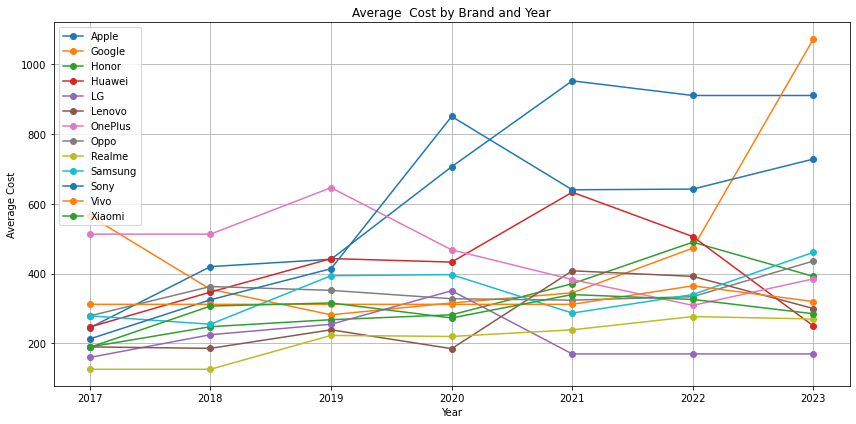

In [213]:

# Create a line plot
plt.figure(figsize=(12, 6))

for x in by_brand.columns:
    plt.plot(by_brand.index, by_brand[x], marker='o', label=x)
    
plt.xlabel('Year')
plt.ylabel('Average Cost')
plt.title('Average  Cost by Brand and Year')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
    

We have a large number of smartphone brands in our dataset, which can make the analysis noisy and complex. To simplify our analysis and better understand the trends, we have decided to narrow our focus to the top 3 brands. 

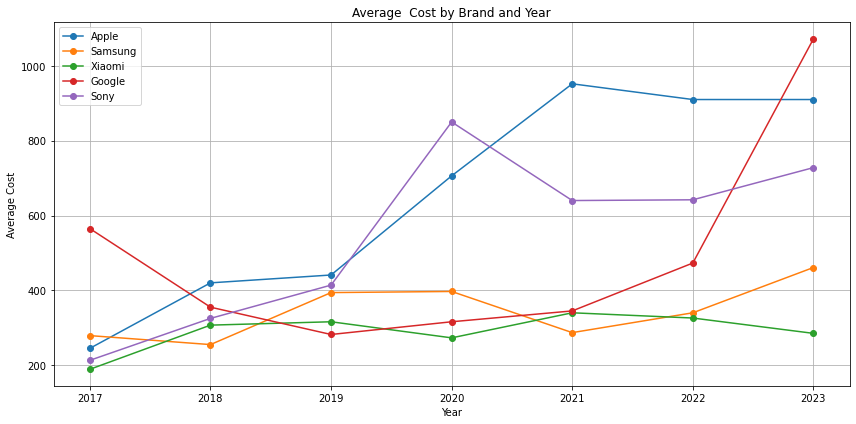

In [214]:
# Create a line plot
plt.figure(figsize=(12, 6))

for x in by_brand[['Apple','Samsung','Xiaomi','Google','Sony']]:
    plt.plot(by_brand.index, by_brand[x], marker='o', label=x)
    
plt.xlabel('Year')
plt.ylabel('Average Cost')
plt.title('Average  Cost by Brand and Year')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
    

We want to find the inflation from 2017 to 2023.we used open source Banks' data.

### And the answer is definitely 'yes.' Prices have significantly increased for some brands over the years.

### 2. Can we predict price based only on inflation?


In [215]:
#creating DateFRAME based on open source 
inflation=pd.DataFrame({'year':[2017,2018,2019,2020,2021,2022,2023],'inflation':[1,1.02,1.04,1.06,1.11,1.19,1.25]})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


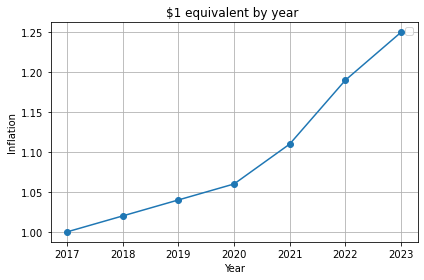

In [216]:
plt.plot(inflation['year'], inflation['inflation'], marker='o')
    
plt.xlabel('Year')
plt.ylabel('Inflation')
plt.title('$1 equivalent by year ')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [217]:
#Counting inflation rate from 2017 to 2023

inf_rate=(1+25.26/100)


In [218]:
#calculating 2017 prices counting the inflation
compare=pd.DataFrame()
compare['2023_inf_2017']=by_brand.loc[2017]*inf_rate
compare['2023_real_price']=by_brand.loc[2023]

We want to create a visualization that allows us to compare the actual prices of smartphones in 2023 with the prices they would have been in 2017, adjusted for inflation. 

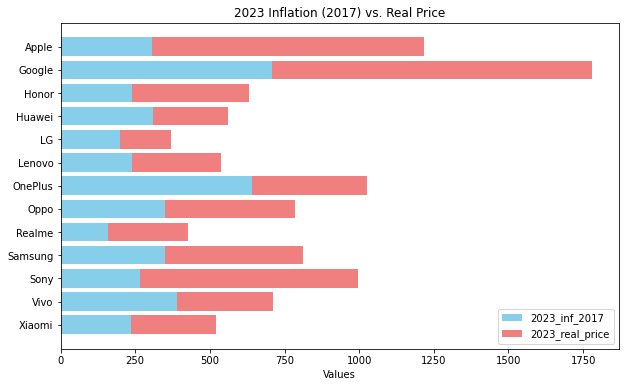

In [219]:
# Create bar chart
plt.figure(figsize=(10, 6))
plt.barh(compare.index, compare['2023_inf_2017'] , color='skyblue', label='2023_inf_2017')
plt.barh(compare.index, compare['2023_real_price'], color='lightcoral', label='2023_real_price', left=compare['2023_inf_2017'])

# Customize the chart
plt.xlabel('Values')
plt.title('2023 Inflation (2017) vs. Real Price')
plt.legend()
plt.gca().invert_yaxis()  # Invert the y-axis to have the top brand at the top

# Show the chart
plt.show()

### Not really. As we can notice, the real price is much higher than the price of 2017 when accounting for inflation.

### 3. Does price depand on features of the phone?


Next step is to find what features create the price.We build correlation matrix to find linear correlation between price and other features

In [220]:
correlation_matrix = phone_base[['price(USD)','inches','battery','ram(GB)','video_240fps','video_480fps','video_960fps','year','megapixel','weight(g)','Android','EMUI','Tizen','iOS','Huawei','LG','Xiaomi','Sony','Oppo','Samsung','Lenovo','Apple','Google','Honor','Realme','OnePlus','Vivo']].corr()
for x,y in correlation_matrix['price(USD)'].items():
    if y>0.3:
        print(x,y)

price(USD) 1.0
megapixel 0.3532922851813108


We can consider megapixels _as weak positive correlation

<AxesSubplot:>

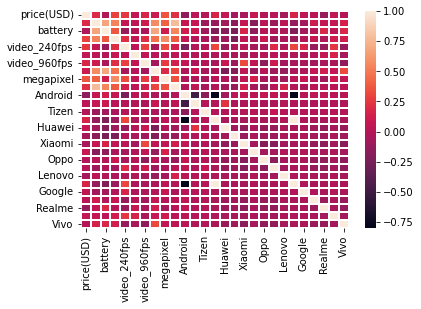

In [221]:
sns.heatmap(correlation_matrix, linewidths=0.01)


### The only correlation that we may consider as a weak positive one is megapixels, or in other words, the quality of the screen. We have a neutral correlation with other features. However, this is only linear correlation, so there's a chance that while building a model, we would find non-linear correlations.

### 4. Can We Predict Prices Using Machine Learning Techniques like RainForestRegression?

In [222]:
#choosing feature to build a model
using_data=phone_base[['inches','battery','ram(GB)','video_240fps','video_480fps','video_960fps','price(USD)','year','megapixel','weight(g)','Android','EMUI','Tizen','iOS','Huawei','LG','Xiaomi','Sony','Oppo','Samsung','Lenovo','Apple','Google','Honor','Realme','OnePlus','Vivo']]
using_data

,inches,battery,ram(GB),video_240fps,video_480fps,video_960fps,price(USD),year,megapixel,weight(g),...,Sony,Oppo,Samsung,Lenovo,Apple,Google,Honor,Realme,OnePlus,Vivo
0,5.00,2200,2,0,0,0,120.000,2016,0.92160,140.0,...,0,0,0,0,0,0,0,0,0,0
1,5.30,2700,2,0,0,0,100.000,2016,0.92160,140.0,...,0,0,0,0,0,0,0,0,0,0
2,5.20,3000,4,0,0,0,420.000,2017,2.07360,147.0,...,0,0,0,0,0,0,0,0,0,0
3,5.50,4100,4,0,0,0,150.000,2017,2.07360,165.0,...,0,0,0,0,0,0,0,0,0,0
4,5.10,3200,4,0,0,0,420.000,2017,2.07360,145.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,6.64,5000,8,0,0,0,170.000,2023,2.57904,190.0,...,0,0,0,0,0,0,0,0,0,1
1508,6.72,5000,8,0,0,0,182.880,2023,2.59200,190.0,...,0,0,0,0,0,0,0,1,0,0
1509,6.74,5240,16,0,0,0,380.000,2023,3.43728,205.0,...,0,0,0,0,0,0,0,1,0,0
1510,6.74,4600,24,0,0,0,470.000,2023,3.43728,205.0,...,0,0,0,0,0,0,0,1,0,0


In [223]:
#choosing target and features
X = using_data.drop('price(USD)', axis=1)
y = using_data['price(USD)']

In [224]:
#split data on training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [225]:
print('Training X Shape:', X_train.shape)
print('Training y Shape:', y_train.shape)
print('Testing X Shape:', X_test.shape)
print('Testing y Shape:', y_test.shape)


Training X Shape: (1209, 26)
Training y Shape: (1209,)
Testing X Shape: (303, 26)
Testing y Shape: (303,)


In [226]:

# For RainForest regression mse
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

errors = abs((y_pred  - y_test)/y_test)
sum(errors)/y_test.shape[0]

Mean Squared Error: 60279.57


0.512060811797692

In [227]:
#trying to improve our model by increasing n_estimators
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.20, random_state=42)
model1 = RandomForestRegressor(n_estimators=200)
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)

In [228]:
# For RainForest regression mse
mse = mean_squared_error(y1_test, y1_pred)
print(f'Mean Squared Error: {mse:.2f}')
errors = abs((y1_pred  - y1_test)/y1_test)
sum(errors)/y1_test.shape[0]

Mean Squared Error: 60378.47


0.5021747126561221

## Improving the model

In [229]:
phone_base['price(USD)'].mean()

337.84703571428605

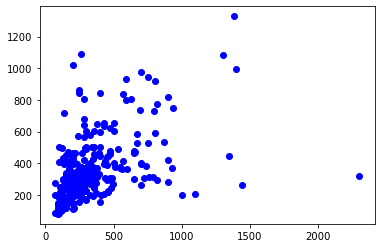

In [230]:
plt.scatter(y_test, y_pred, c ="blue")

We are going to eliminate the outlier and check our model 

/Users/reznichenkoanastasia/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price(USD)', ylabel='Density'>

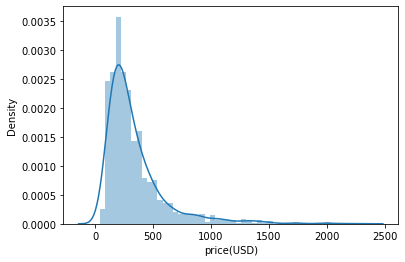

In [231]:
sns.distplot(phone_base['price(USD)'])

We have a few very expansive phones, that _is our ouliers.Let eliminate them and see how our model will perform

In [232]:

filtered_data = using_data.loc[using_data['price(USD)']<using_data['price(USD)'].quantile(0.99)]

In [233]:
filtered_data.shape

(1494, 27)

In [234]:
X1 = filtered_data.drop('price(USD)', axis=1)
y1= filtered_data['price(USD)']



X2_train, X2_test, y2_train, y2_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100)
model.fit(X2_train, y2_train)
y2_pred = model.predict(X2_test)




# For regression
mse = mean_squared_error(y2_test, y2_pred)
print(f'Mean Squared Error: {mse:.2f}')

errors = abs((y2_pred  - y2_test)/y2_test)
sum(errors)/y2_test.shape[0]


Mean Squared Error: 36777.84


0.42980431752286524

Improving our model.Finding non-linear correlation and eliminate features that don't have correlation and just produce noise.

In [235]:
#creating importances,std,feature_names 
importances =model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
feature_names = [i for i in X]


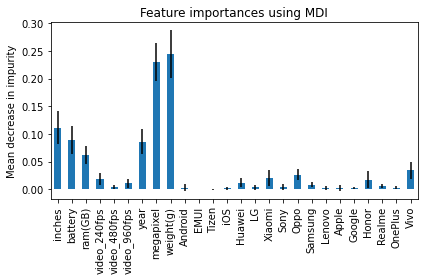

In [236]:
#visualizating
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [237]:
impr_data=phone_base[['inches','battery','ram(GB)','video_240fps','video_480fps','video_960fps','price(USD)','year','megapixel','weight(g)','Huawei','LG','Xiaomi','Sony','Oppo','Samsung','Lenovo','Apple','Google','Honor','Realme','OnePlus','Vivo']]

In [238]:
improve = impr_data.loc[impr_data['price(USD)']<impr_data['price(USD)'].quantile(0.99)]

In [239]:
X2 = improve.drop('price(USD)', axis=1)
y2 = improve['price(USD)']



X3_train, X3_test, y3_train, y3_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=10000 )
model.fit(X3_train, y3_train)
y3_pred = model.predict(X3_test)




# For regression
mse = mean_squared_error(y3_test, y3_pred)
print(f'Mean Squared Error: {mse:.2f}')

errors = abs((y3_pred  - y3_test)/y3_test)
sum(errors)/y3_test.shape[0]


Mean Squared Error: 37067.85


0.4300328795850056

### First of all we found that weight has very good non-linear correlation with the price.And after improving over model, we can say that we can predict the price of the phone based on it's feutures.

## Improving model tuning hyperparameters

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error: 34234.49
Model MAE: 124.18


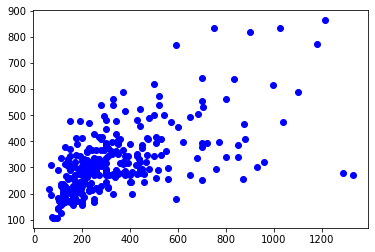

In [240]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at each leaf node
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search.fit(X3_train, y3_train)

# Get the best hyperparameter values
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y3_pred = best_rf_model.predict(X3_test)

mse = mean_squared_error(y3_test, y3_pred)

print(f'Mean Squared Error: {mse:.2f}')

error= mean_absolute_error(y3_test,y3_pred)

errors = abs((y3_pred  - y3_test)/y3_test)

sum(errors)/y3_test.shape[0]

print(f"Model MAE: {error:.2f}")

plt.scatter(y3_test, y3_pred, c ="blue")


## BenchMark


In [241]:


# Calculate the average price from the training data
average_price = np.mean(y3_train)

# Create predictions using the average price
simple_predictions = np.full_like(y3_train, average_price)

# Calculate the benchmark metric (e.g., MAE)
simple_mae = mean_absolute_error(y3_train, simple_predictions)

mse_simple = mean_squared_error(y3_train, simple_predictions)

print(f"Simple model MAE: {simple_mae :.2f}")

Simple model MAE: 156.78


In [242]:
forest_model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)
forest_model.fit(X3_train, y3_train)

# Make predictions using the advanced model
y_predictions = advanced_model.predict(X3_train)

# Calculate the advanced model's MAE
advanced_mae = mean_absolute_error(y3_train, advanced_predictions)

print(f"Advanced Model MAE: {advanced_mae:.2f}")

Advanced Model MAE: 53.33


In [243]:
from sklearn.linear_model import LinearRegression

X5 = improve.drop('price(USD)', axis=1)

y5 = improve['price(USD)']

X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)


model= LinearRegression()

model.fit(X5_train, y5_train)

y5_pred = model.predict(X5_test)

mae_linear = mean_absolute_error(y5_test, y5_pred)
mse_linear = mean_squared_error(y5_test, y5_pred)


print(f"Model MAE on Test Set: {mae_linear:.2f}",mse_linear)





Model MAE on Test Set: 139.48 39990.42767946929


In [244]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Assuming you have already defined X5 and y5

# Split the data into training and testing sets
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)

# Create and fit the Random Forest Regressor model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed
forest_model.fit(X5_train, y5_train)

# Make predictions on the test set
y5_pred = forest_model.predict(X5_test)

# Calculate the Mean Absolute Error (MAE) on the test set
mae = mean_absolute_error(y5_test, y5_pred)

# Print the model's performance
print(f"Random Forest Model MAE on Test Set: {mae:.2f}")

Random Forest Model MAE on Test Set: 125.17


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error: 34234.49
Model MAE: 124.18


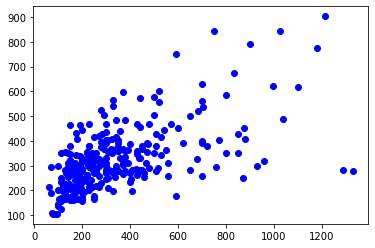

In [245]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at each leaf node
}


grid_search = GridSearchCV(estimator=forest_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


grid_search.fit(X5_train, y5_train)

# Get the best hyperparameter values
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y3_pred = best_rf_model.predict(X5_test)

mse_forest = mean_squared_error(y5_test, y5_pred)

print(f'Mean Squared Error: {mse:.2f}')

error_forest= mean_absolute_error(y5_test,y5_pred)

errors = abs((y5_pred  - y5_test)/y5_test)

sum(errors)/y5_test.shape[0]

print(f"Model MAE: {error:.2f}")

plt.scatter(y3_test, y3_pred, c ="blue")


In [259]:
models = ['Linear Regression', 'RandomForest Regression Model', 'Average price from the Training Data']
mse_scores = [39990,36451,48228]  #  MSE values
mae_scores = [139,125,157]    #MAE values



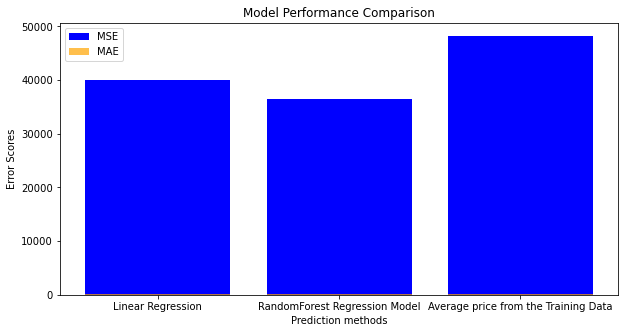

In [249]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'RandomForest Regression Model', 'Average price from the Training Data']
mse_scores = [mse_linear, mse_forest, mse_simple]  # Example MSE values
mae_scores = [mae_linear, error_forest, simple_mae]        # Example MAE values

plt.figure(figsize=(10, 5))
plt.bar(models, mse_scores, color='blue', label='MSE')
plt.bar(models, mae_scores, color='orange', label='MAE', alpha=0.7)
plt.xlabel('Prediction methods')
plt.ylabel('Error Scores')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()

In [260]:
from tabulate import tabulate

models = ['Linear Regression', 'RandomForest Regression Model', 'Average price from the Training Data']
mse_scores = [39990, 36451, 48228]  # MSE values
mae_scores = [139, 125, 157]  # MAE values

data = {'Model': models, 'Mean Squared Error (MSE)': mse_scores, 'Mean Absolute Error (MAE)': mae_scores}

# Display the data in a tabulated format
table = tabulate(data, headers='keys', tablefmt='pretty')
print(table)

+--------------------------------------+--------------------------+---------------------------+
|                Model                 | Mean Squared Error (MSE) | Mean Absolute Error (MAE) |
+--------------------------------------+--------------------------+---------------------------+
|          Linear Regression           |          39990           |            139            |
|    RandomForest Regression Model     |          36451           |            125            |
| Average price from the Training Data |          48228           |            157            |
+--------------------------------------+--------------------------+---------------------------+
